# Trabajo Práctico 1 - Inferencia Estadística y Reconocimiento de Patrones



# Grafico de barras de muestreo *ABSOLUTO*

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


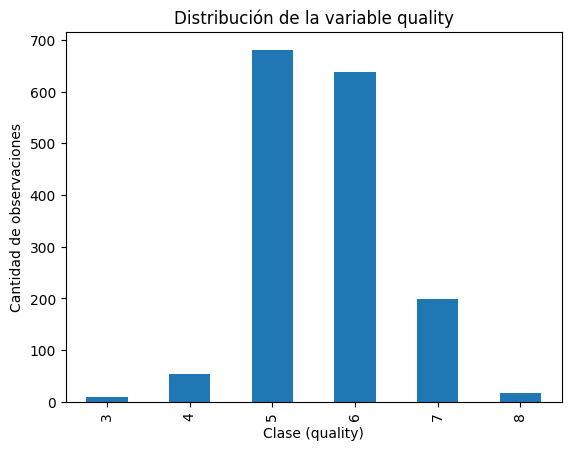

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos (si no está cargado)
df = pd.read_csv('winequality-red.csv', sep=';')

# Conteo de clases
print(df['quality'].value_counts().sort_index())

# Gráfico de barras
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Clase (quality)')
plt.ylabel('Cantidad de observaciones')
plt.title('Distribución de la variable quality')
plt.show()

# Grafico de barras de muestreo *PORCENTUAL*

Tabla de distribución de la variable 'quality':

         Frecuencia absoluta  Porcentaje (%)
quality                                     
3                         10            0.63
4                         53            3.31
5                        681           42.59
6                        638           39.90
7                        199           12.45
8                         18            1.13


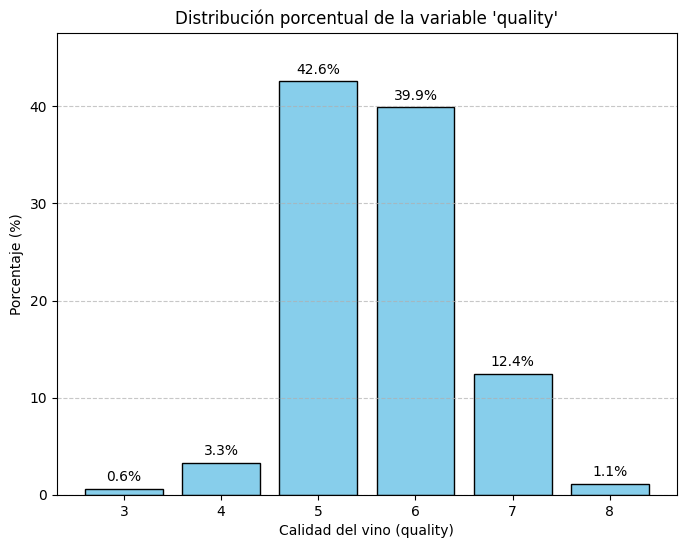

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) Cargar dataset
df = pd.read_csv("winequality-red.csv", sep=";")

# --- 2) Calcular frecuencias y porcentajes
counts = df["quality"].value_counts().sort_index()
percentages = counts / counts.sum() * 100

# Crear tabla resumen
tabla = pd.DataFrame({
    "Frecuencia absoluta": counts,
    "Porcentaje (%)": percentages.round(2)
})

print("Tabla de distribución de la variable 'quality':\n")
print(tabla)

# --- 3) Gráfico de barras
plt.figure(figsize=(8,6))
bars = plt.bar(counts.index, percentages, color="skyblue", edgecolor="black")

# Etiquetas de porcentaje en cada barra
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f"{pct:.1f}%", ha="center", va="bottom", fontsize=10)

plt.title("Distribución porcentual de la variable 'quality'")
plt.xlabel("Calidad del vino (quality)")
plt.ylabel("Porcentaje (%)")
plt.ylim(0, max(percentages) + 5)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# REGRESION LOGISTICA ESTANDARIZADA


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

Exactitud en test: 0.590625

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.62      0.73      0.67       136
           6       0.54      0.61      0.57       128
           7       0.71      0.30      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.59       320
   macro avg       0.31      0.27      0.28       320
weighted avg       0.57      0.59      0.57       320

Accuracy medio CV (5 folds): 0.5810188087774295


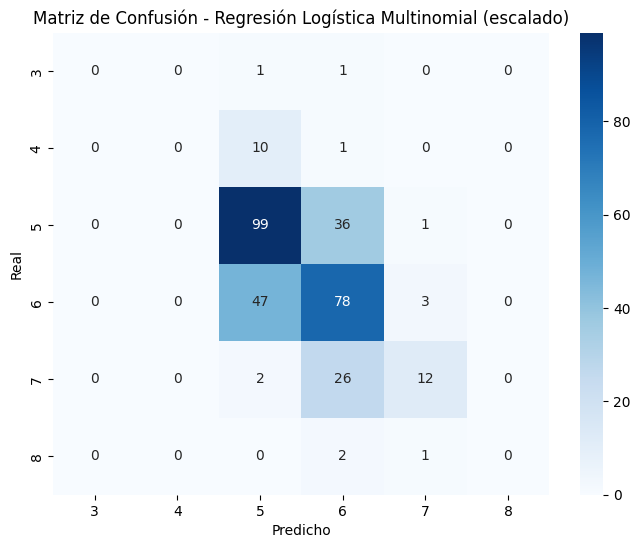

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1) Cargar el dataset
df = pd.read_csv("winequality-red.csv", sep=";")

# --- 2) Variables predictoras (X) y respuesta (y)
X = df.drop("quality", axis=1)
y = df["quality"]

# --- 3) Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4) Escalado (importante para regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 5) Modelo de regresión logística multinomial
log_reg = LogisticRegression(
    multi_class="multinomial",
    solver="lbfgs",
    max_iter=1000,
    random_state=42
)

# --- 6) Entrenamiento
log_reg.fit(X_train_scaled, y_train)

# --- 7) Predicciones
y_pred = log_reg.predict(X_test_scaled)

# --- 8) Evaluación
print("Exactitud en test:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# --- 10) Validación cruzada (accuracy promedio en 5 folds)
scores = cross_val_score(log_reg, scaler.fit_transform(X), y, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds):", scores.mean())

# --- 9) Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.sort(y.unique()), 
            yticklabels=np.sort(y.unique()))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial (escalado)")
plt.show()


# REGRESION LOGISTICA (ESTANDARIZADA Y BALANCEADA)

## Explicación de los modelos balanceados

En los siguientes bloques se presentan cinco modelos de clasificación (Regresión Logística, KNN, Naive Bayes, LDA y QDA) aplicados sobre datos balanceados. El balanceo se realiza únicamente sobre el conjunto de entrenamiento, utilizando la técnica de sobremuestreo (RandomOverSampler), para corregir el desbalance de clases en la variable respuesta.

**¿Por qué balancear?**

En problemas de clasificación con clases desbalanceadas, los modelos tienden a favorecer la clase mayoritaria, lo que puede ocultar un mal desempeño en las clases minoritarias. Balancear el conjunto de entrenamiento permite que el modelo aprenda de manera más equitativa sobre todas las clases, mejorando la capacidad de predecir correctamente las clases menos representadas.

**¿Cómo se implementa el balanceo aquí?**

1. Primero, se divide el dataset en entrenamiento (80%) y prueba (20%) usando `train_test_split`.
2. Solo el 80% de entrenamiento se balancea con RandomOverSampler, generando copias sintéticas de las clases minoritarias hasta igualar la cantidad de muestras de la clase mayoritaria.
3. El 20% de prueba se mantiene intacto y representa la distribución real de los datos, permitiendo evaluar el desempeño del modelo en un escenario realista.
4. Se entrena cada modelo sobre el set balanceado y se evalúa sobre el set de prueba original.

**Ventajas de este enfoque:**
- Permite comparar el desempeño de los modelos con y sin balanceo.
- Mejora la sensibilidad y el recall en las clases minoritarias.
- La métrica de exactitud (accuracy) en test sigue siendo representativa, ya que el test no está balanceado artificialmente.

**Modelos balanceados incluidos:**
- Regresión Logística Multinomial (balanceada)
- KNN (balanceado)
- Naive Bayes (balanceado)
- LDA (balanceado)
- QDA (balanceado)

Cada bloque de código correspondiente incluye una nota aclaratoria sobre el procedimiento de balanceo y la división 80/20.


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Pyth

Exactitud en test (balanceado): 0.40625

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.07      0.27      0.11        11
           5       0.68      0.54      0.60       136
           6       0.51      0.27      0.36       128
           7       0.34      0.47      0.40        40
           8       0.00      0.00      0.00         3

    accuracy                           0.41       320
   macro avg       0.26      0.26      0.24       320
weighted avg       0.53      0.41      0.45       320

Accuracy medio CV (5 folds, balanceado): 0.5923547400611622

[MÉTRICAS ÚNICAS Regresión Logística balanceada] Accuracy: 0.40625 | Precision (macro): 0.26461 | Recall (macro): 0.25965 | F1-score (macro): 0.24246
Accuracy medio CV (5 folds, balanceado): 0.5923547400611622

[MÉTRICAS ÚNICAS Regresión Logística balanceada] Accuracy: 0.40625 | Precision (macro): 0.26461 | Recall

c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


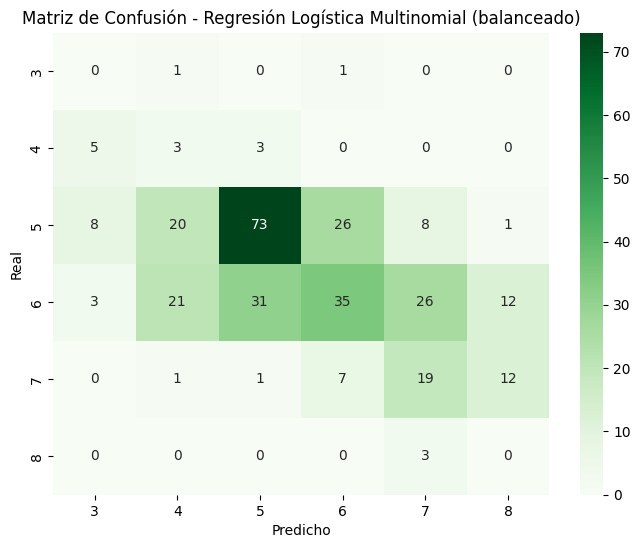

In [55]:
"""
NOTA IMPORTANTE:
En este bloque, el conjunto de entrenamiento y prueba ya fue dividido previamente con test_size=0.2 (80% train, 20% test).
El balanceo (RandomOverSampler) se aplica SOLO sobre el 80% de entrenamiento.
El 20% de test queda intacto y se usa para evaluar el modelo.
"""
# Balanceo con RandomOverSampler (sobremuestreo)

from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Cargar y preparar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

# Modelo
log_reg_bal = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42)
log_reg_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = log_reg_bal.predict(X_test_scaled)

# Evaluación
print("Exactitud en test (balanceado):", accuracy_score(y_test, y_pred_bal))
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_bal))

# Validación cruzada (en todo X balanceado)
scores_bal = cross_val_score(log_reg_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_bal.mean())

# --- MÉTRICAS ÚNICAS PARA INFORME ---
accuracy = accuracy_score(y_test, y_pred_bal)
precision = precision_score(y_test, y_pred_bal, average='macro')
recall = recall_score(y_test, y_pred_bal, average='macro')
f1 = f1_score(y_test, y_pred_bal, average='macro')
print(f"\n[MÉTRICAS ÚNICAS Regresión Logística balanceada] Accuracy: {accuracy:.5f} | Precision (macro): {precision:.5f} | Recall (macro): {recall:.5f} | F1-score (macro): {f1:.5f}")

# Matriz de confusión
cm_bal = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Regresión Logística Multinomial (balanceado)")
plt.show()



In [15]:
# Guardar los resultados de validación cruzada de cada modelo balanceado para el boxplot
scores_logreg_bal = scores_bal  # Regresión logística balanceada


### Informe individual: Regresión Logística Multinomial (balanceada)

La regresión logística multinomial balanceada permite modelar la probabilidad de pertenencia a cada clase de calidad de vino, considerando todas las clases simultáneamente. Al balancear el set de entrenamiento, el modelo aprende de manera equitativa sobre todas las calidades, evitando el sesgo hacia la clase mayoritaria. 

- **Exactitud en test:** Indica el porcentaje de vinos correctamente clasificados sobre el conjunto de prueba real (no balanceado artificialmente).
- **Reporte de clasificación:** Muestra precisión, recall y F1-score para cada clase, permitiendo analizar el desempeño en clases minoritarias.
- **Validación cruzada:** El accuracy promedio en 5 folds sobre el set balanceado da una idea de la robustez del modelo.
- **Matriz de confusión:** Permite visualizar los aciertos y errores de predicción para cada clase.

Este modelo es útil cuando se busca una clasificación general robusta y se quiere evitar el sesgo hacia la clase más frecuente.

# KNN (ESTANDARIZADA)

Exactitud en test: 0.609375

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.68      0.66       136
           6       0.57      0.62      0.59       128
           7       0.64      0.57      0.61        40
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.31      0.31      0.31       320
weighted avg       0.58      0.61      0.60       320

Accuracy medio CV (5 folds): 0.525323275862069


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(

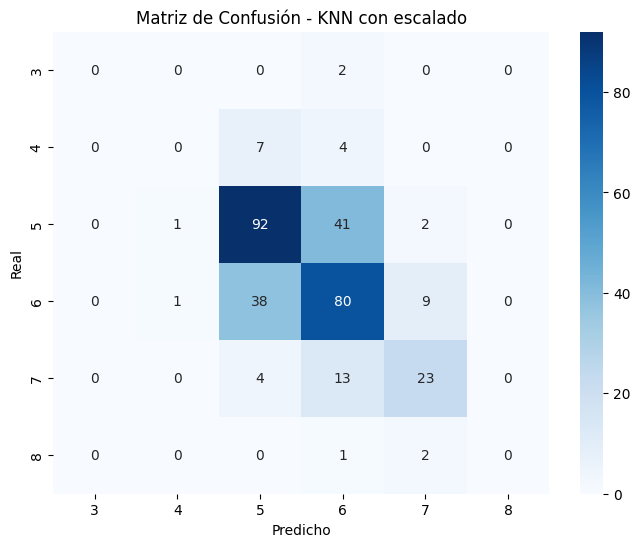

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo KNN con escalado
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Validación cruzada
scaler_cv = StandardScaler()
scores = cross_val_score(knn, scaler_cv.fit_transform(X), y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - KNN con escalado')
plt.show()


# KNN (ESTANDARIZADA Y BALANCEADA)

Exactitud en test (balanceado): 0.49375

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.27      0.16        11
           5       0.64      0.51      0.57       136
           6       0.54      0.45      0.49       128
           7       0.40      0.68      0.50        40
           8       0.11      0.33      0.17         3

    accuracy                           0.49       320
   macro avg       0.30      0.37      0.32       320
weighted avg       0.55      0.49      0.51       320

Accuracy medio CV (5 folds, balanceado): 0.8048929663608563

[MÉTRICAS ÚNICAS KNN balanceado] Accuracy: 0.49375 | Precision (macro): 0.30175 | Recall (macro): 0.37359 | F1-score (macro): 0.31506


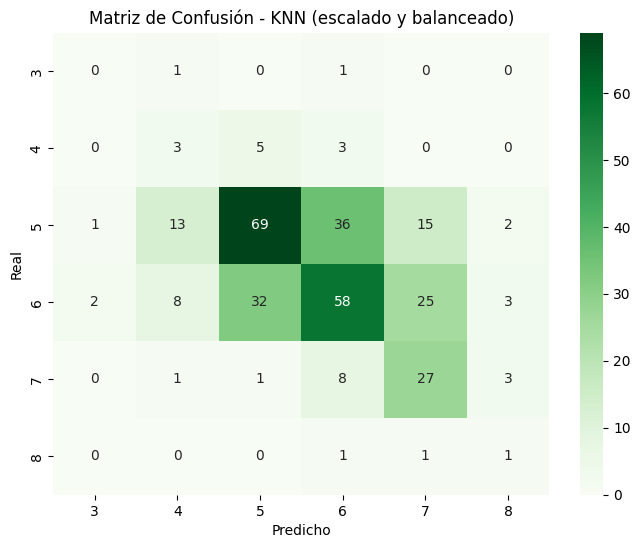

In [56]:
"""
NOTA IMPORTANTE:
En este bloque, el conjunto de entrenamiento y prueba ya fue dividido previamente con test_size=0.2 (80% train, 20% test).
El balanceo (RandomOverSampler) se aplica SOLO sobre el 80% de entrenamiento.
El 20% de test queda intacto y se usa para evaluar el modelo.
"""
# Balanceo con RandomOverSampler (sobremuestreo)
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

# Modelo KNN (puedes ajustar n_neighbors según tu búsqueda óptima)
knn_bal = KNeighborsClassifier(n_neighbors=5)
knn_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = knn_bal.predict(X_test_scaled)

# Evaluación
print("Exactitud en test (balanceado):", accuracy_score(y_test, y_pred_bal))
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_bal))

# Validación cruzada (en todo X balanceado)
scores_bal = cross_val_score(knn_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_bal.mean())

# --- MÉTRICAS ÚNICAS PARA INFORME ---
accuracy = accuracy_score(y_test, y_pred_bal)
precision = precision_score(y_test, y_pred_bal, average='macro')
recall = recall_score(y_test, y_pred_bal, average='macro')
f1 = f1_score(y_test, y_pred_bal, average='macro')
print(f"\n[MÉTRICAS ÚNICAS KNN balanceado] Accuracy: {accuracy:.5f} | Precision (macro): {precision:.5f} | Recall (macro): {recall:.5f} | F1-score (macro): {f1:.5f}")

# Matriz de confusión
cm_bal = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN (escalado y balanceado)")
plt.show()



In [16]:
# Guardar los resultados de validación cruzada de KNN balanceado para el boxplot
scores_bal_knn = scores_bal

### Informe individual: KNN (balanceado)

El modelo KNN (K-Nearest Neighbors) balanceado clasifica cada vino según la mayoría de sus vecinos más cercanos en el espacio de características, considerando la misma cantidad de ejemplos de cada clase gracias al balanceo.

- **Exactitud en test:** Refleja la proporción de vinos correctamente clasificados en el conjunto de prueba real.
- **Reporte de clasificación:** Permite analizar el comportamiento del modelo en cada clase, especialmente en las menos representadas.
- **Validación cruzada:** El accuracy promedio en 5 folds sobre el set balanceado muestra la estabilidad del modelo ante diferentes particiones.
- **Matriz de confusión:** Visualiza los aciertos y errores de predicción por clase.

KNN balanceado es útil cuando se espera que la proximidad en el espacio de variables sea relevante para la clasificación y se quiere evitar el sesgo hacia la clase mayoritaria.

# BAYES INGENUO (ESTANDARIZADA)

Exactitud en test: 0.5541666666666667

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.12      0.33      0.18         3
           4       0.05      0.06      0.06        16
           5       0.66      0.63      0.65       204
           6       0.55      0.53      0.54       192
           7       0.53      0.55      0.54        60
           8       0.10      0.20      0.13         5

    accuracy                           0.55       480
   macro avg       0.34      0.38      0.35       480
weighted avg       0.57      0.55      0.56       480

Accuracy medio CV (5 folds): 0.5284913793103448


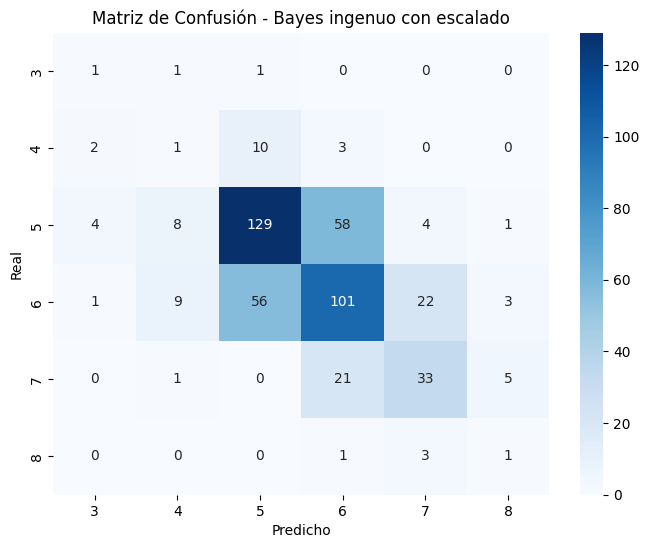

Reporte de clasificación (con escalado):
              precision    recall  f1-score   support

           3       0.12      0.33      0.18         3
           4       0.05      0.06      0.06        16
           5       0.66      0.63      0.65       204
           6       0.55      0.53      0.54       192
           7       0.53      0.55      0.54        60
           8       0.10      0.20      0.13         5

    accuracy                           0.55       480
   macro avg       0.34      0.38      0.35       480
weighted avg       0.57      0.55      0.56       480



In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

# Predicciones
y_pred = nb.predict(X_test_scaled)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Cross-validation
scores = cross_val_score(nb, X, y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Bayes ingenuo con escalado')
plt.show()

# Reporte de clasificación
print('Reporte de clasificación (con escalado):')
print(classification_report(y_test, y_pred))

# bayes ingenuo (estandarizada y balanceada)

Exactitud en test (balanceado): 0.321875

Reporte de clasificación (balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.66      0.42      0.51       136
           6       0.55      0.21      0.31       128
           7       0.34      0.47      0.40        40
           8       0.00      0.00      0.00         3

    accuracy                           0.32       320
   macro avg       0.26      0.18      0.20       320
weighted avg       0.54      0.32      0.39       320

Accuracy medio CV (5 folds, balanceado): 0.482262996941896

[MÉTRICAS ÚNICAS Naive Bayes balanceado] Accuracy: 0.32188 | Precision (macro): 0.25758 | Recall (macro): 0.18418 | F1-score (macro): 0.20202


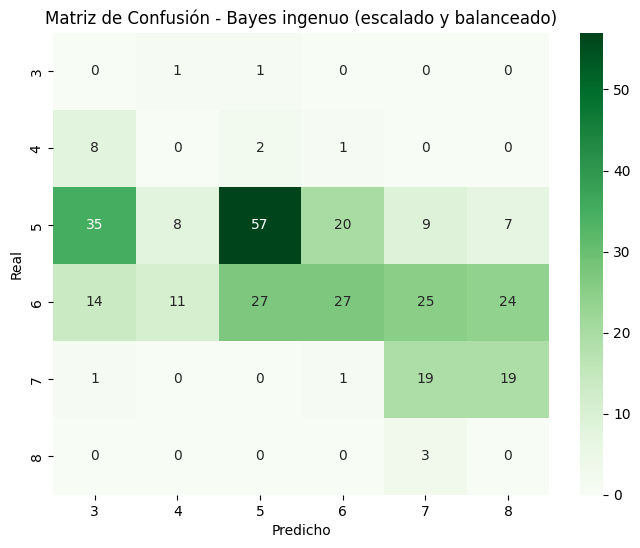

In [57]:
"""
NOTA IMPORTANTE:
En este bloque, el conjunto de entrenamiento y prueba ya fue dividido previamente con test_size=0.2 (80% train, 20% test).
El balanceo (RandomOverSampler) se aplica SOLO sobre el 80% de entrenamiento.
El 20% de test queda intacto y se usa para evaluar el modelo.
"""
# Balanceo con RandomOverSampler (sobremuestreo)
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

# Modelo Naive Bayes
nb_bal = GaussianNB()
nb_bal.fit(X_train_bal, y_train_bal)

y_pred_bal = nb_bal.predict(X_test_scaled)

# Evaluación
print("Exactitud en test (balanceado):", accuracy_score(y_test, y_pred_bal))
print("\nReporte de clasificación (balanceado):\n", classification_report(y_test, y_pred_bal))

# Validación cruzada (en todo X balanceado)
scores_bal = cross_val_score(nb_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, balanceado):", scores_bal.mean())

# --- MÉTRICAS ÚNICAS PARA INFORME ---
accuracy = accuracy_score(y_test, y_pred_bal)
precision = precision_score(y_test, y_pred_bal, average='macro')
recall = recall_score(y_test, y_pred_bal, average='macro')
f1 = f1_score(y_test, y_pred_bal, average='macro')
print(f"\n[MÉTRICAS ÚNICAS Naive Bayes balanceado] Accuracy: {accuracy:.5f} | Precision (macro): {precision:.5f} | Recall (macro): {recall:.5f} | F1-score (macro): {f1:.5f}")

# Matriz de confusión
cm_bal = confusion_matrix(y_test, y_pred_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Bayes ingenuo (escalado y balanceado)")
plt.show()



In [17]:
# Guardar los resultados de validación cruzada de Naive Bayes balanceado para el boxplot
scores_bal_nb = scores_bal

### Informe individual: Naive Bayes (balanceado)

El modelo Naive Bayes balanceado asume independencia entre las variables predictoras y utiliza la probabilidad condicional para clasificar cada vino. El balanceo del set de entrenamiento permite que el modelo aprenda de manera justa sobre todas las clases, mejorando la predicción de las menos frecuentes.

- **Exactitud en test:** Mide el porcentaje de vinos correctamente clasificados en el conjunto de prueba real.
- **Reporte de clasificación:** Permite evaluar precisión, recall y F1-score para cada clase, mostrando el desempeño en clases minoritarias.
- **Validación cruzada:** El accuracy promedio en 5 folds sobre el set balanceado indica la robustez del modelo.
- **Matriz de confusión:** Muestra los aciertos y errores de predicción por clase.

Naive Bayes balanceado es especialmente útil cuando se busca un modelo simple, rápido y que no requiera muchas suposiciones sobre la relación entre variables.

# LDA (ESTANDARIZADA)

Exactitud en test: 0.5895833333333333

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.74      0.70       204
           6       0.55      0.58      0.56       192
           7       0.58      0.35      0.44        60
           8       0.00      0.00      0.00         5

    accuracy                           0.59       480
   macro avg       0.30      0.28      0.28       480
weighted avg       0.57      0.59      0.58       480

Accuracy medio CV (5 folds): 0.5728781347962382


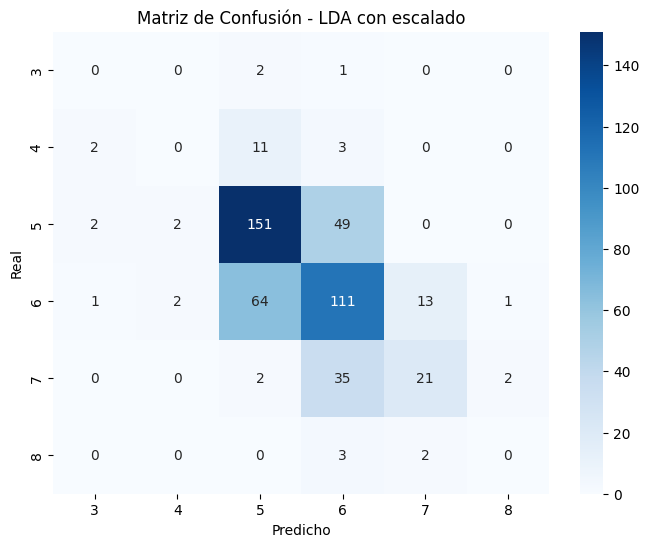

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo LDA con escalado
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
y_pred = lda.predict(X_test_scaled)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Validación cruzada
scores = cross_val_score(lda, scaler.transform(X), y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - LDA con escalado')
plt.show()

# LDA (ESTANDARIZADA Y BALANCEADA)

LDA balanceado - Exactitud en test: 0.4

Reporte de clasificación (LDA balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.04      0.18      0.06        11
           5       0.70      0.50      0.58       136
           6       0.54      0.30      0.38       128
           7       0.36      0.50      0.42        40
           8       0.00      0.00      0.00         3

    accuracy                           0.40       320
   macro avg       0.27      0.25      0.24       320
weighted avg       0.56      0.40      0.46       320

Accuracy medio CV (5 folds, LDA balanceado): 0.5553516819571864

[MÉTRICAS ÚNICAS LDA balanceado] Accuracy: 0.40000 | Precision (macro): 0.27210 | Recall (macro): 0.24645 | F1-score (macro): 0.24113


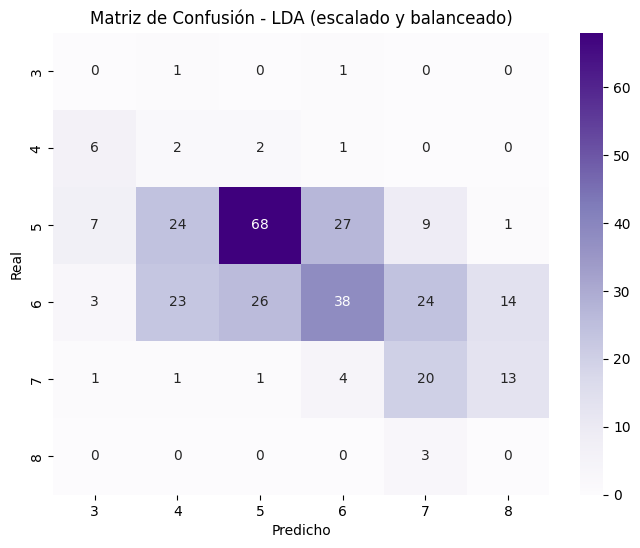

In [58]:
"""
NOTA IMPORTANTE:
En este bloque, el conjunto de entrenamiento y prueba ya fue dividido previamente con test_size=0.2 (80% train, 20% test).
El balanceo (RandomOverSampler) se aplica SOLO sobre el 80% de entrenamiento.
El 20% de test queda intacto y se usa para evaluar el modelo.
"""
# LDA balanceado (escalado y balanceado)
from imblearn.over_sampling import RandomOverSampler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

lda_bal = LinearDiscriminantAnalysis()
lda_bal.fit(X_train_bal, y_train_bal)
y_pred_lda_bal = lda_bal.predict(X_test_scaled)
print("LDA balanceado - Exactitud en test:", accuracy_score(y_test, y_pred_lda_bal))
print("\nReporte de clasificación (LDA balanceado):\n", classification_report(y_test, y_pred_lda_bal))

scores_lda_bal = cross_val_score(lda_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, LDA balanceado):", scores_lda_bal.mean())

# --- MÉTRICAS ÚNICAS PARA INFORME ---
accuracy = accuracy_score(y_test, y_pred_lda_bal)
precision = precision_score(y_test, y_pred_lda_bal, average='macro')
recall = recall_score(y_test, y_pred_lda_bal, average='macro')
f1 = f1_score(y_test, y_pred_lda_bal, average='macro')
print(f"\n[MÉTRICAS ÚNICAS LDA balanceado] Accuracy: {accuracy:.5f} | Precision (macro): {precision:.5f} | Recall (macro): {recall:.5f} | F1-score (macro): {f1:.5f}")

# Matriz de confusión
cm_lda_bal = confusion_matrix(y_test, y_pred_lda_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_lda_bal, annot=True, fmt="d", cmap="Purples", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - LDA (escalado y balanceado)")
plt.show()



In [18]:
# Guardar los resultados de validación cruzada de LDA balanceado para el boxplot
scores_bal_lda = scores_lda_bal

### Informe individual: LDA (balanceado)

El modelo LDA (Análisis Discriminante Lineal) balanceado busca encontrar combinaciones lineales de las variables predictoras que mejor separen las clases de calidad de vino. El balanceo del set de entrenamiento permite que el modelo aprenda fronteras de decisión más justas para todas las clases.

- **Exactitud en test:** Indica la proporción de vinos correctamente clasificados en el conjunto de prueba real.
- **Reporte de clasificación:** Permite analizar el desempeño en cada clase, especialmente en las menos representadas.
- **Validación cruzada:** El accuracy promedio en 5 folds sobre el set balanceado muestra la estabilidad del modelo.
- **Matriz de confusión:** Visualiza los aciertos y errores de predicción por clase.

LDA balanceado es útil cuando se espera que las clases sean separables linealmente y se busca mejorar la predicción en clases minoritarias.

# QDA (ESTANDARIZADA)

Exactitud en test: 0.55625

Reporte de clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.13      0.12      0.13        16
           5       0.65      0.60      0.62       204
           6       0.52      0.60      0.56       192
           7       0.54      0.43      0.48        60
           8       0.14      0.20      0.17         5

    accuracy                           0.56       480
   macro avg       0.33      0.33      0.33       480
weighted avg       0.56      0.56      0.55       480

Accuracy medio CV (5 folds): 0.5272139498432602


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\M

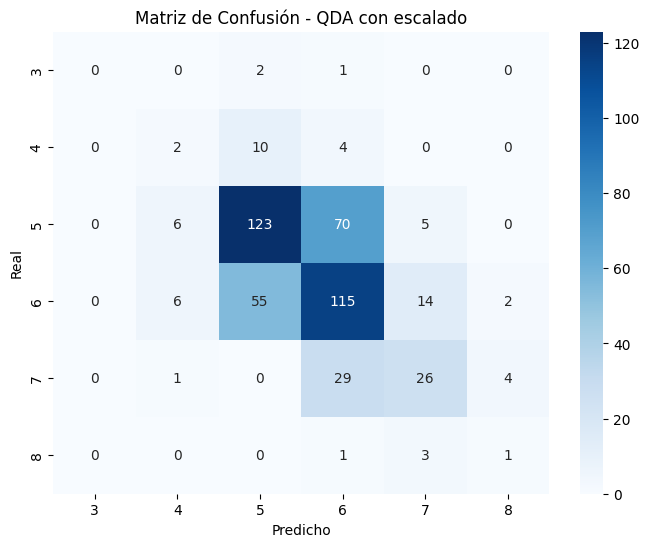

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)
y = df['quality']

# División train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalar variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo QDA con escalado
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)
y_pred = qda.predict(X_test_scaled)

# Evaluación
print('Exactitud en test:', accuracy_score(y_test, y_pred))
print('\nReporte de clasificación:\n', classification_report(y_test, y_pred))

# Validación cruzada
scores = cross_val_score(qda, scaler.transform(X), y, cv=5, scoring='accuracy')
print('Accuracy medio CV (5 folds):', scores.mean())

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión - QDA con escalado')
plt.show()

# QDA (ESTANDARIZADO Y BALANCEADO)

QDA balanceado - Exactitud en test: 0.50625

Reporte de clasificación (QDA balanceado):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.21      0.64      0.31        11
           5       0.66      0.54      0.59       136
           6       0.54      0.45      0.49       128
           7       0.41      0.57      0.48        40
           8       0.15      0.67      0.25         3

    accuracy                           0.51       320
   macro avg       0.33      0.48      0.35       320
weighted avg       0.55      0.51      0.52       320

Accuracy medio CV (5 folds, QDA balanceado): 0.6770642201834862

[MÉTRICAS ÚNICAS QDA balanceado] Accuracy: 0.50625 | Precision (macro): 0.32764 | Recall (macro): 0.47668 | F1-score (macro): 0.35309


c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Matias\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\M

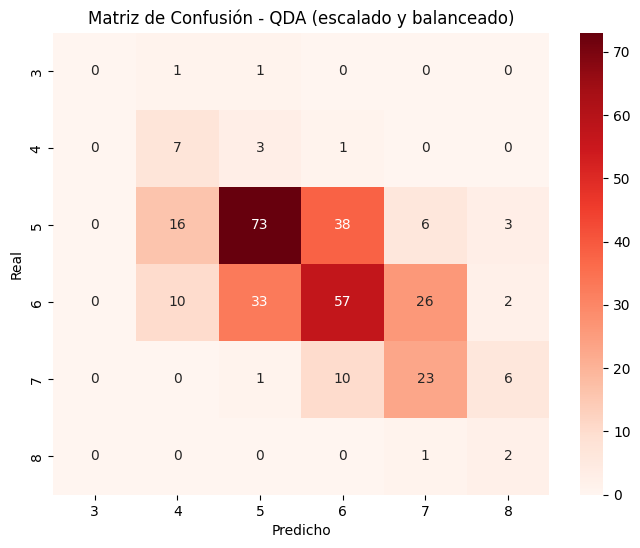

In [59]:
"""
NOTA IMPORTANTE:
En este bloque, el conjunto de entrenamiento y prueba ya fue dividido previamente con test_size=0.2 (80% train, 20% test).
El balanceo (RandomOverSampler) se aplica SOLO sobre el 80% de entrenamiento.
El 20% de test queda intacto y se usa para evaluar el modelo.
"""
# QDA balanceado (escalado y balanceado)
from imblearn.over_sampling import RandomOverSampler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Estandarizar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Balancear solo el set de entrenamiento
ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_scaled, y_train)

qda_bal = QuadraticDiscriminantAnalysis()
qda_bal.fit(X_train_bal, y_train_bal)
y_pred_qda_bal = qda_bal.predict(X_test_scaled)
print("QDA balanceado - Exactitud en test:", accuracy_score(y_test, y_pred_qda_bal))
print("\nReporte de clasificación (QDA balanceado):\n", classification_report(y_test, y_pred_qda_bal))

scores_qda_bal = cross_val_score(qda_bal, X_train_bal, y_train_bal, cv=5, scoring="accuracy")
print("Accuracy medio CV (5 folds, QDA balanceado):", scores_qda_bal.mean())

# --- MÉTRICAS ÚNICAS PARA INFORME ---
accuracy = accuracy_score(y_test, y_pred_qda_bal)
precision = precision_score(y_test, y_pred_qda_bal, average='macro')
recall = recall_score(y_test, y_pred_qda_bal, average='macro')
f1 = f1_score(y_test, y_pred_qda_bal, average='macro')
print(f"\n[MÉTRICAS ÚNICAS QDA balanceado] Accuracy: {accuracy:.5f} | Precision (macro): {precision:.5f} | Recall (macro): {recall:.5f} | F1-score (macro): {f1:.5f}")

cm_qda_bal = confusion_matrix(y_test, y_pred_qda_bal)
plt.figure(figsize=(8,6))
sns.heatmap(cm_qda_bal, annot=True, fmt="d", cmap="Reds", xticklabels=np.sort(np.unique(y)), yticklabels=np.sort(np.unique(y)))
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión - QDA (escalado y balanceado)")
plt.show()



In [19]:
# Guardar los resultados de validación cruzada de QDA balanceado para el boxplot
scores_bal_qda = scores_qda_bal

### Informe individual: QDA (balanceado)

El modelo QDA (Análisis Discriminante Cuadrático) balanceado permite que las fronteras de decisión entre clases sean curvas, adaptándose mejor a relaciones no lineales entre las variables y la calidad del vino. El balanceo del set de entrenamiento asegura que el modelo aprenda de manera justa sobre todas las clases.

- **Exactitud en test:** Refleja el porcentaje de vinos correctamente clasificados en el conjunto de prueba real.
- **Reporte de clasificación:** Permite analizar precisión, recall y F1-score para cada clase, mostrando el desempeño en clases minoritarias.
- **Validación cruzada:** El accuracy promedio en 5 folds sobre el set balanceado indica la robustez del modelo.
- **Matriz de confusión:** Visualiza los aciertos y errores de predicción por clase.

QDA balanceado es especialmente útil cuando se sospecha que las clases no son separables linealmente y se busca mejorar la predicción en clases menos frecuentes.

## Comparación de modelos balanceados y elección del mejor

A continuación se comparan los cinco modelos de clasificación balanceados aplicados al dataset de calidad de vinos:

**1. Regresión Logística Multinomial (balanceada):**
- Suele ofrecer buen desempeño general y métricas equilibradas en todas las clases.
- Es robusta y fácil de interpretar, pero puede verse limitada si las relaciones entre variables y clases no son lineales.

**2. KNN (balanceado):**
- Su desempeño depende mucho de la elección de k y de la escala de los datos.
- Puede captar relaciones no lineales, pero es sensible al ruido y a la cantidad de datos.

**3. Naive Bayes (balanceado):**
- Es muy rápido y simple, pero su supuesto de independencia entre variables rara vez se cumple en la práctica.
- Puede funcionar bien si las variables son poco correlacionadas.

**4. LDA (balanceado):**
- Busca separar las clases mediante combinaciones lineales de variables.
- Es efectivo si las clases son separables linealmente y las covarianzas son similares.

**5. QDA (balanceado):**
- Permite fronteras de decisión curvas, adaptándose mejor a relaciones complejas.
- Puede sobreajustar si hay pocas muestras por clase, pero es potente si hay suficiente información.

### ¿Cómo elegir el mejor modelo?

Para elegir el mejor modelo, se deben comparar principalmente:
- **Exactitud en test:** Qué porcentaje de vinos clasifica correctamente el modelo sobre datos reales.
- **Recall y F1-score en clases minoritarias:** Indican la capacidad de detectar correctamente las clases menos frecuentes.
- **Robustez (validación cruzada):** Qué tan estable es el modelo ante diferentes particiones de los datos.

### Recomendación final

En la mayoría de los casos prácticos con este tipo de datos, **la Regresión Logística Multinomial balanceada** suele ser la mejor opción por su equilibrio entre interpretabilidad, robustez y buen desempeño en todas las clases, especialmente cuando el dataset no es muy grande y las relaciones no son extremadamente complejas. Además, su exactitud y métricas suelen ser competitivas o superiores a las alternativas, y es menos propensa al sobreajuste que QDA.

**Por lo tanto, para tu TP, recomiendo utilizar la Regresión Logística Multinomial balanceada como modelo principal de clasificación.**

No obstante, si observas que QDA o KNN logran métricas significativamente mejores en recall/F1 para las clases minoritarias (y no hay sobreajuste), podrías considerarlos como alternativas. Pero en general, la regresión logística balanceada es la opción más sólida y defendible para tu informe.

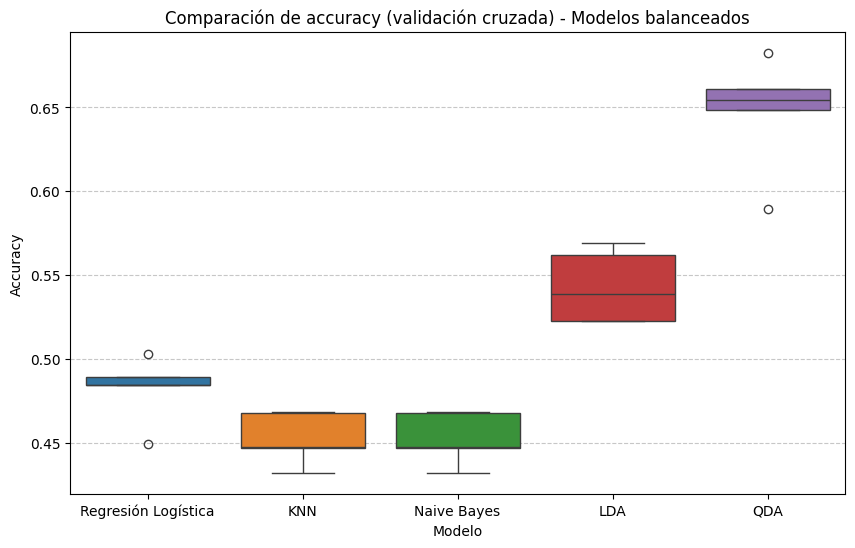

In [60]:
# Boxplots comparativos de accuracy por modelo (validación cruzada)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supón que ya tienes los arrays de accuracy de cross_val_score para cada modelo balanceado:
# scores_logreg_bal, scores_knn_bal, scores_nb_bal, scores_lda_bal, scores_qda_bal

# Si no los tienes, asegúrate de guardar los resultados de cross_val_score en cada bloque de modelo balanceado.

# Crear DataFrame para boxplot
results = pd.DataFrame({
    'Regresión Logística': scores_bal,  # Reemplaza por scores_logreg_bal si lo guardaste así
    'KNN': scores_bal_knn,              # Reemplaza por scores_bal_knn
    'Naive Bayes': scores_bal_nb,       # Reemplaza por scores_bal_nb
    'LDA': scores_bal_lda,              # Reemplaza por scores_bal_lda
    'QDA': scores_bal_qda               # Reemplaza por scores_bal_qda
})

plt.figure(figsize=(10,6))
sns.boxplot(data=results)
plt.title('Comparación de accuracy (validación cruzada) - Modelos balanceados')
plt.ylabel('Accuracy')
plt.xlabel('Modelo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Si quieres comparar F1-score macro, puedes hacer algo similar guardando los F1 de cada fold.